<a href="https://colab.research.google.com/github/tomfox1/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [99]:
#importing pandas library and our .data file from the UCI repo
import pandas as pd
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
#it is important to pass header as "None" in order for us to include the first instance of data from our data set
df = pd.read_csv(url, header = None)
#checking for missing values; there appears to be none 
df.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [0]:
#renaming our headers with more representative labels
list_headers = ["Age", "Year", "Nodes", "Survival"] 
df.columns = list_headers

In [0]:
#reencoding the survival variable; we only have to reencode the values "2" to "0", as "1" already repesents survivors for 5+ years 
#Renaming the variable is probably not the most efficient way to reencode the "Survival status" variable 
df2 = df.replace({"Survival": 2}, 0)

In [102]:
df2.head(5)

,Age,Year,Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [103]:
#We will produce some crosstabulations here in order to examine our data 
#binning our variables will make our attempt to understand the data more cohesive
#While not a science, 5 bins for each variable seems enough for our purposes of mapping out the data 
bins_age = pd.cut(df["Age"], 5)
bins_year = pd.cut(df["Year"], 5)

#plotting our crosstabs and presenting them in percentages for clarity
#A first glance at our data does not shed much light 
ct = pd.crosstab(bins_age, df2["Survival"])
ct.head()


Survival,0,1
Age,,
"(29.947, 40.6]",4,39
"(40.6, 51.2]",31,68
"(51.2, 61.8]",27,69
"(61.8, 72.4]",16,43
"(72.4, 83.0]",3,6


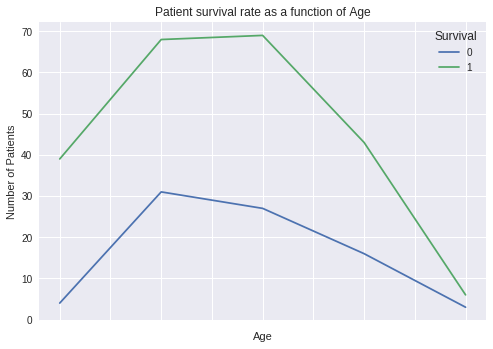

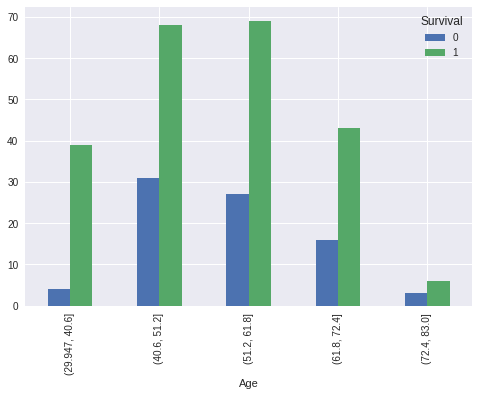

In [110]:
#adding labels to our graph to make the data clearer 
#As people Age their survival rate decreases
#bar graphs are also plotted to illustrate how line graphs are derived.
ax = ct.plot();
ax.set_title("Patient survival rate as a function of Age")
ax.set_xlabel("Age")
ax.set_ylabel("Number of Patients")
ax; ct.plot.bar();

In [105]:
#A first glance at our data appears to show us that someone with fewer nodes - our 1st bin - has more chances of surviving for 5+ years
#As we go towards the other 4 bins it seems more of a lottery or 50/50 chance that our patients will either survive for more or for less then 5+ years
bins_nodes = pd.cut(df["Nodes"], 5)
ct2 = pd.crosstab(bins_nodes, df2["Survival"])
ct2.head(10)


Survival,0,1
Nodes,,
"(-0.052, 10.4]",58,208
"(10.4, 20.8]",15,11
"(20.8, 31.2]",6,5
"(31.2, 41.6]",1,0
"(41.6, 52.0]",1,1


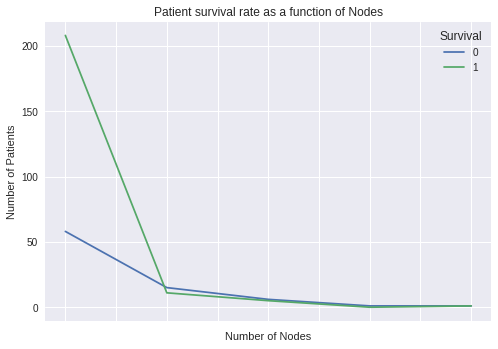

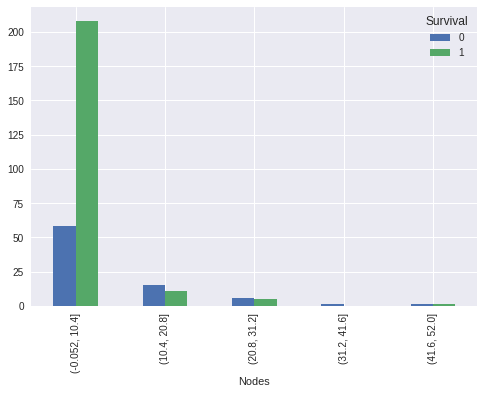

In [106]:
#As number of nodes increases survival rate decreases, a sharper decline is seen with 5+ years survivors as Nodes increase then seen with <5 years survivors.
ax2 = ct2.plot()
ax2.set_title("Patient survival rate as a function of Nodes")
ax2.set_xlabel("Number of Nodes")
ax2.set_ylabel("Number of Patients")
ax2; ct2.plot.bar();

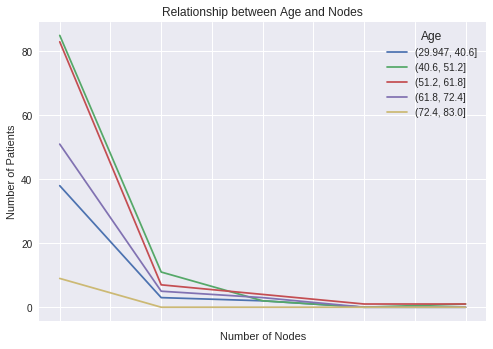

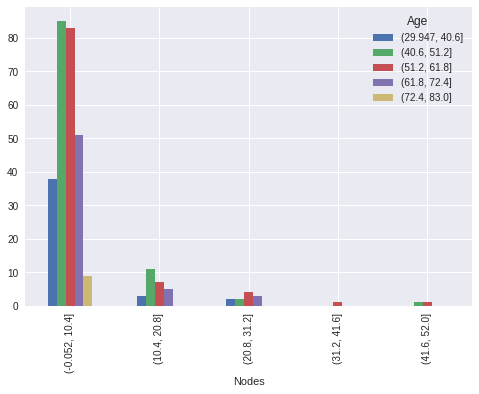

In [107]:
#There does not seem to be a relationship between age and number of nodes, and even if there were we don't have enough data to make an informed decision.
#The issue at hand is that while it may make logical sense to assume that as Age increases patients could develop more nodes, it could be a coincidence.
ct3 = pd.crosstab(bins_nodes, bins_age)
ax3 = ct3.plot()

ax3.set_xlabel("Number of Nodes")
ax3.set_ylabel("Number of Patients")
ax3.set_title("Relationship between Age and Nodes")
ax3; ct3.plot.bar();

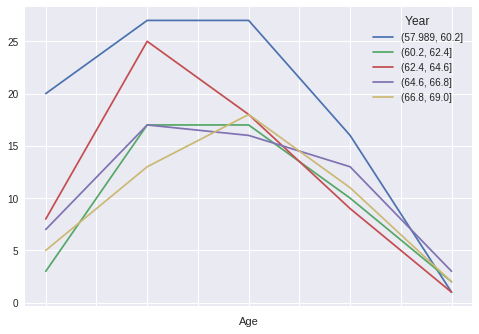

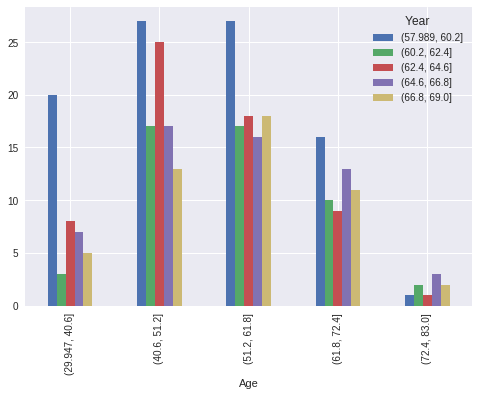

In [108]:
#For the years 1957-1960 there were more patients that underwent surgery, 
#There could be other factors contributing to this, 
#for example, within those years there couLd have been enviornmental factors that contributed to a higher incidence of breast cancer; however, more data is needed.
#We will now further analyze some other variables 
ct4 = pd.crosstab(bins_age, bins_year)
ct4.plot(); ct4.plot.bar();

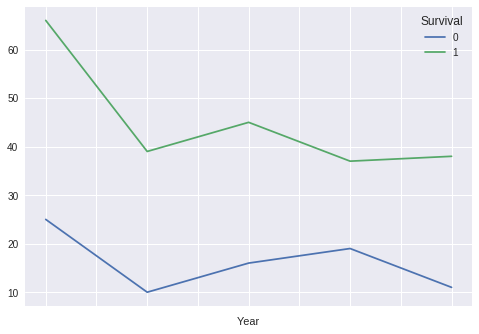

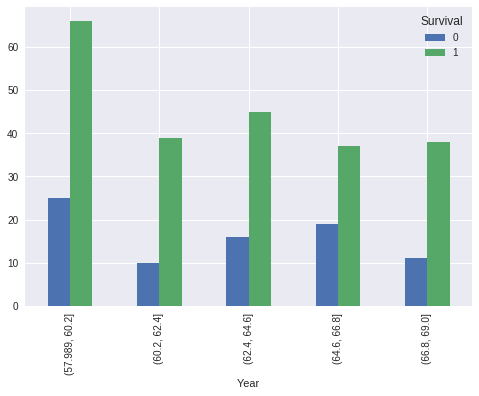

In [109]:
#Also, plotting "Year" with "survival status" does not seem to tell us anything, more data would be needed to draw further conclusions
#Data pattern is similar for early survivors and also for late survivors
ct5 = pd.crosstab(bins_year, df2["Survival"])
ct5.plot(); ct5.plot.bar();

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

**ANSWERS: **

**1) Age initally shows a positive relationship with survival (at around age 29-40) and then begins to fall, starting from the second bin through the last one, for both early and late survivors **

**2) It is clear that number of nodes has a negative relationship with survival, as the number of nodes increases survival rates go down for both early and late survivors.**

**3) There does not seem to be a relationship between node and age; one might assume prematurely that as patients age they would develop more nodes, but we have insufficient data to be able to affirm that. **

**CONCLUSION: While it seems we have found relationships between some of our variables, there could very likely be spurious variables that are affecting our data. For further investigation it would be useful to know whether our patients have 1) medical preconditions 2) genetic predispositions to develop cancer 3) history of unhealthy behavior such as smking or drug use 4) patient medical coverage, as patients that have better health coverage could have been more sucesfull at attempts at preventive care.**


